<a href="https://colab.research.google.com/github/risen9/scaler-projects/blob/main/Yulu_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Problem Statement

Yulu is a mobility company that offers bike rentals all over the world.

Their India operations is looking to increase revenue after several setbacks.

Analyse the factors that affect the demand for electric cycle rentals in our market by using hypothesis testing

# 1. Basic Metrics

## Importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('bike_sharing.csv')

## Examining the data

In [ ]:
data.head(7)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2


In [ ]:
data.shape

(10886, 12)

There are 10,886 rows of data split across 12 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Check for null values

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No null values found

## Check for duplicate values

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

No duplicated data found

## Analysis of numerical and categorical variables

### Numerical

<Axes: xlabel='count', ylabel='Count'>

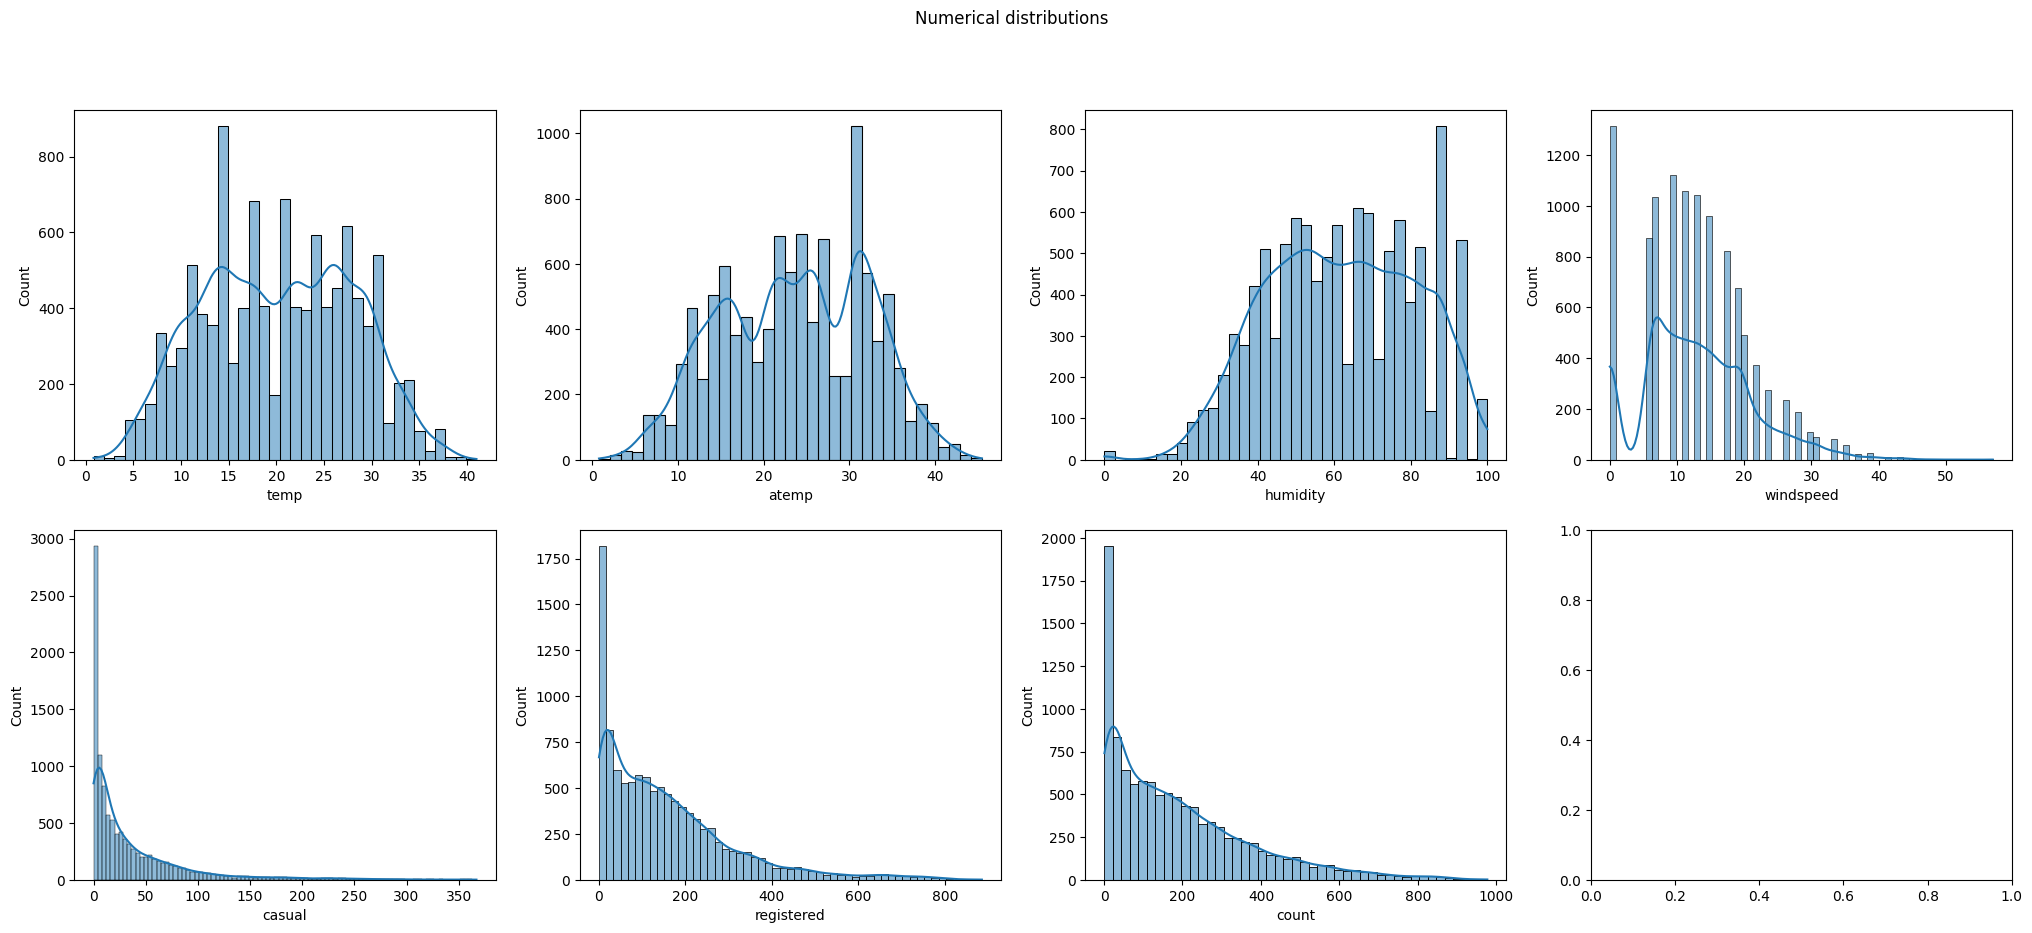

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(25,10))
fig.suptitle('Numerical distributions')

# Temperature
sns.histplot(data = data, x='temp', kde=True, ax=ax[0,0])

# Temperature (feeling)
sns.histplot(data = data, x='atemp', kde=True,ax=ax[0,1])

# humidity
sns.histplot(data = data, x='humidity',kde=True, ax=ax[0,2])

# windspeed
sns.histplot(data = data, x='windspeed', kde=True, ax=ax[0,3])

# Casual users
sns.histplot(data = data, x='casual', kde=True, ax=ax[1,0])

# Registered users
sns.histplot(data = data, x='registered', kde=True, ax=ax[1,1])

# Count
sns.histplot(data = data, x='count', kde=True, ax=ax[1,2])



### Categorical

<Axes: xlabel='workingday', ylabel='count'>

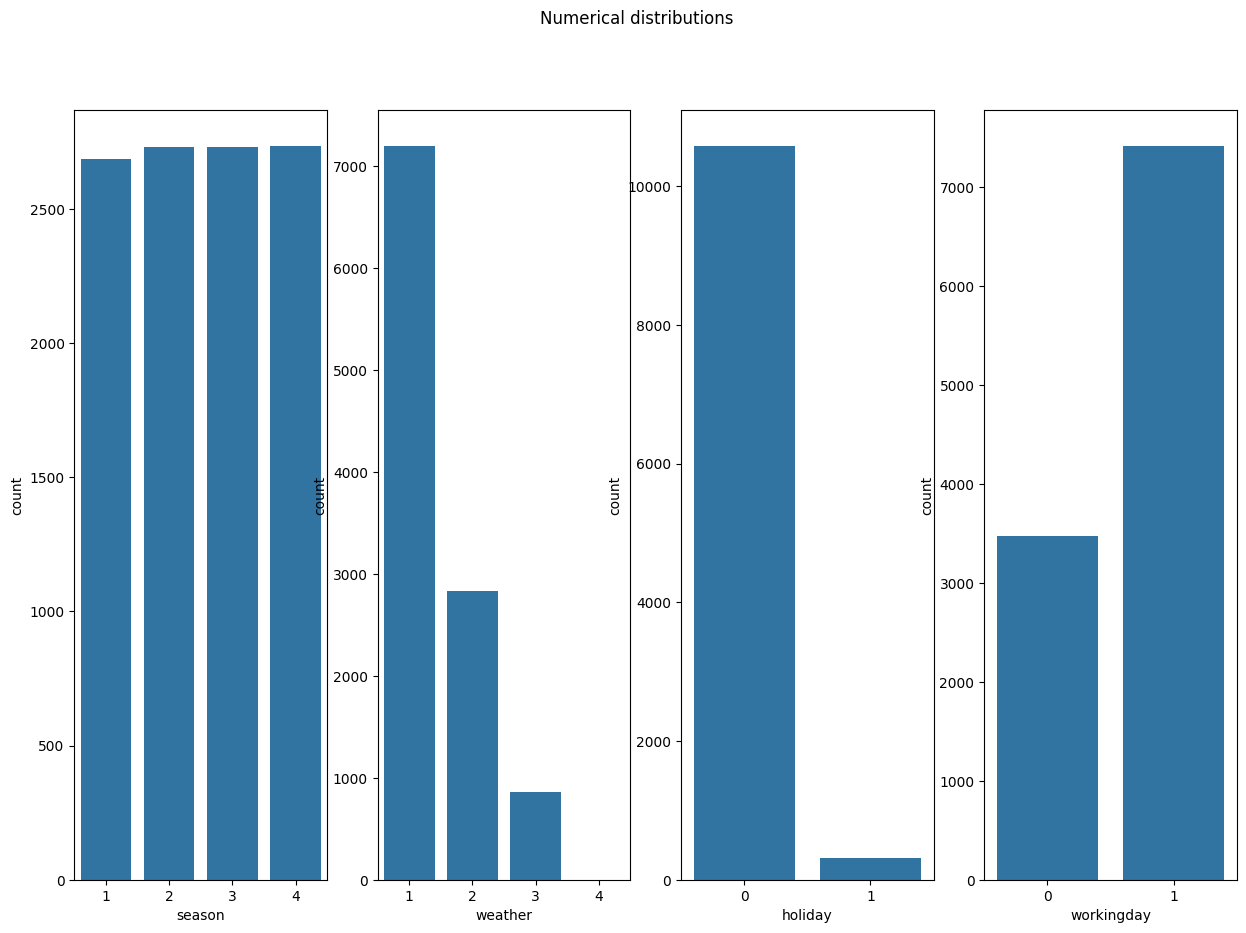

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(15,10))
fig.suptitle('Numerical distributions')

# Season
sns.countplot(data = data, x='season', ax=ax[0])

# Weather type
sns.countplot(data = data, x='weather',ax=ax[1])

# Holiday (yes or no)
sns.countplot(data = data, x='holiday', ax=ax[2])

# Working day (yes or no)
sns.countplot(data = data, x='workingday', ax=ax[3])


## Establishing a relationship between dependent and independent variables

Correlation heatmap

In [ ]:
import copy

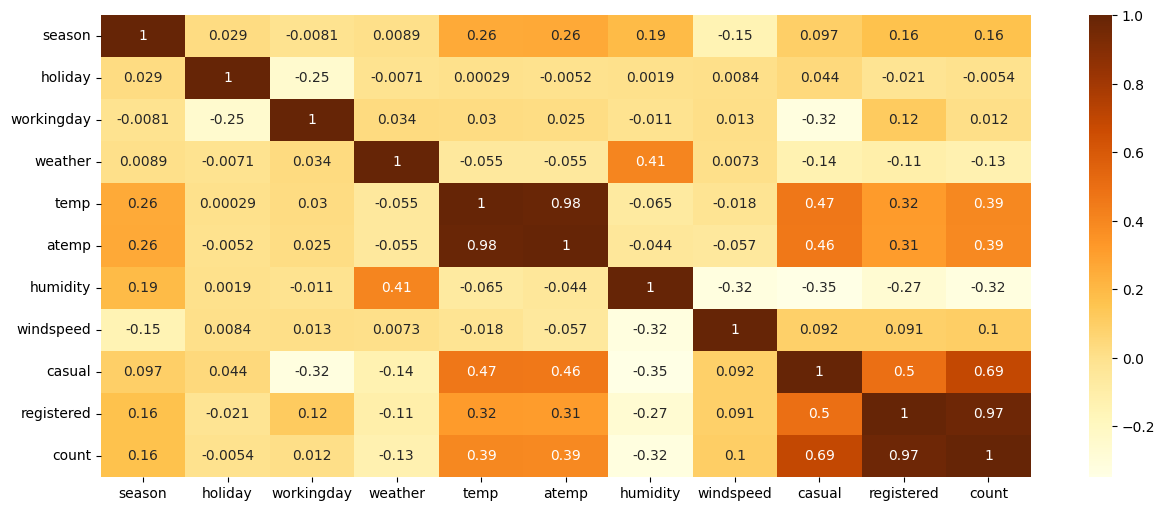

In [ ]:
data_copy = data.copy(deep=1)

correlation = data_copy.corr(numeric_only=True)

plt.figure(figsize=(15,6))

sns.heatmap(correlation, annot=True, cmap='YlOrBr')
plt.show()

* Very high correlation between atemp, temp and count, registered
* Moderate correlation exists for casual, count, and casual, registered
* Low correlation between count, temp; count, atemp; casual, atemp

# 2. Hypothesis testing

### a. Checking if there is any signifcant difference between the number of bike rides on weekdays vs weekends

* $H_{0}$ = weekday rides equal to weekend rides

* $H_{a}$ = weekday rides more than weekend rides


We use 2 sample independent T test to test out hypothesis

In [ ]:
# separating weekday and weekend rides

data.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
weekend = data[data['workingday']==0]['count'].sample(3474)
weekday = data[data['workingday']==1]['count'].sample(3474)

We set our alpha to 0.05


In [ ]:
test_stat, p_value = ttest_ind(weekday, weekend, equal_var= True, alternative = 'less') # variances assumed to be equal
print(p_value)

0.9538868666344982


In [ ]:
if p_value < 0.05:
  print('reject null hypothesis: weekday rides are not equal to weekend rides')
else:
  print('fail to reject null hypothesis: weekday rides are equal to weekend rides')

fail to reject null hypothesis: weekday rides are equal to weekend rides


From two sample T test we understand that there is no big difference from the rides rented in the weekends vs the ones rented in the weekdays.

### b. Checking if weather makes a significant difference in bike rentals

In [ ]:
data.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
# dropping data corresponding weather id 4
data = data[~(data['weather']==4)]


In [ ]:
# dividing data into the rest of the three weather groups

weather_1 = data[data['weather']==1]['count'].sample(859)
weather_2 = data[data['weather']==2]['count'].sample(859)
weather_3 = data[data['weather']==3]['count'].sample(859)

* $H_{0}$ = weather does not make a difference in bike rentals

* $H_{a}$ = weather does make a difference in bike rentals

Normality check with QQ plot

[]

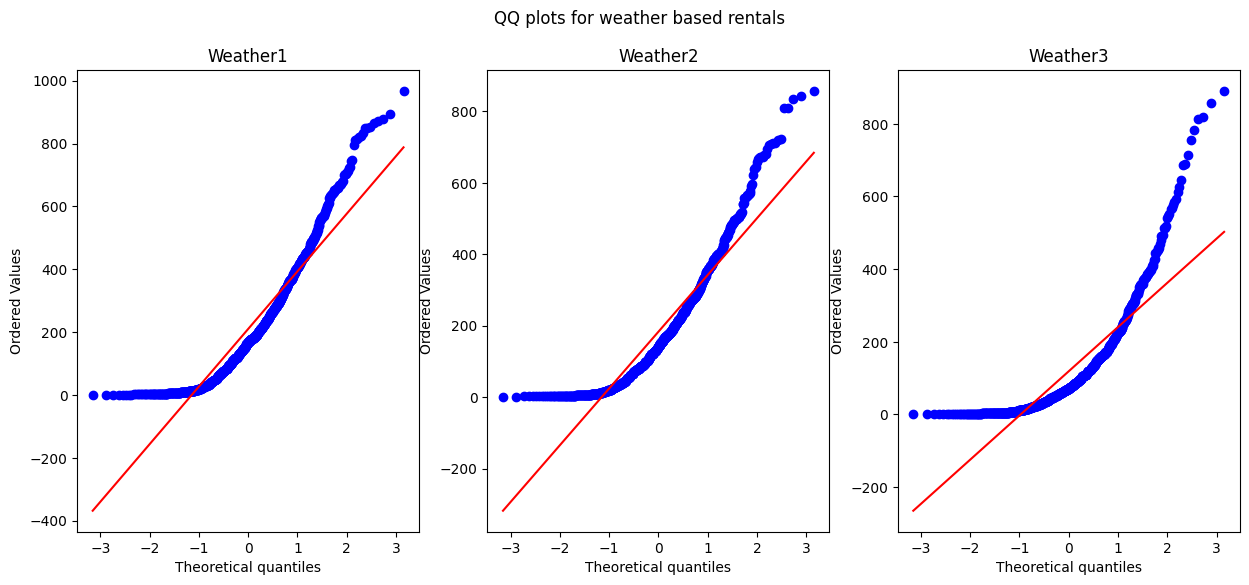

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for weather based rentals')

#weather 1

st.probplot(weather_1, plot = plt, dist = 'norm')
plt.title('Weather1')

#weather 2

plt.subplot(1, 3, 2)
st.probplot(weather_2, plot = plt, dist = 'norm')
plt.title('Weather2')

# weather 3

plt.subplot(1, 3, 3)
st.probplot(weather_3, plot = plt, dist = 'norm')
plt.title('Weather3')

plt.plot()

The plots suggest that the distributions do not follow normal distribution

Using Shapiro Wilk test

In [ ]:
from scipy.stats import shapiro

In [ ]:
# weather 1

test_stat, p_value = shapiro(weather_1)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


In [ ]:
# weather 2

test_stat, p_value = shapiro(weather_2)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


In [ ]:
# weather 3

test_stat, p_value = shapiro(weather_3)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


None of the samples follow normal distribution

Applying Levene's Test

In [ ]:
from scipy.stats import levene

In [ ]:
test_stat, p_value = levene(weather_1, weather_2, weather_3)

if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

The samples do not have  Homogenous Variance


Since all ANOVA assumptions are violated, we use Kruskal-Wallis test.

In [ ]:
from scipy.stats import kruskal

Taking

* $H_{0}$ = weather does not make a difference in bike rentals

* $H_{a}$ = weather does make a difference in bike rentals

* alpha = 0.05



In [ ]:
test_stat, p_value = kruskal(weather_1, weather_2, weather_3)

if p_value < 0.05:
    print('Reject Null Hypothesis: weather does make a difference in bike rentals')
else:
    print('Failed to reject Null Hypothesis: weather does not make a difference in bike rentals')

Reject Null Hypothesis: weather does make a difference in bike rentals


Therefore, weather does affect bike rentals

### c. Checking if seasons affect renting

In [ ]:
data.season.value_counts()

season
4    2734
2    2733
3    2733
1    2685
Name: count, dtype: int64

In [ ]:
# dividing data into four season groups

season_1 = data[data['season']==1]['count'].sample(2685)
season_2 = data[data['season']==2]['count'].sample(2685)
season_3 = data[data['season']==3]['count'].sample(2685)
season_4 = data[data['season']==4]['count'].sample(2685)


* $H_{0}$ = season does not make a difference in bike rentals

* $H_{a}$ = season does make a difference in bike rentals

Normality check with QQ plot

[]

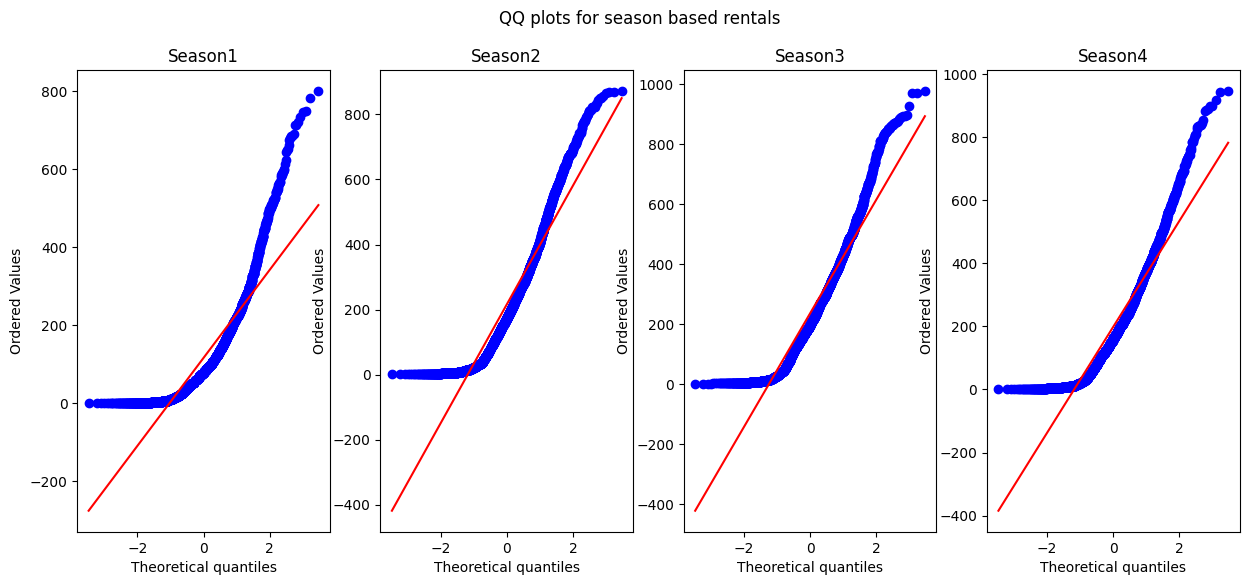

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 4, 1)
plt.suptitle('QQ plots for season based rentals')

#season 1

st.probplot(season_1, plot = plt, dist = 'norm')
plt.title('Season1')

#season 2

plt.subplot(1, 4, 2)
st.probplot(season_2, plot = plt, dist = 'norm')
plt.title('Season2')

# season 3

plt.subplot(1, 4, 3)
st.probplot(season_3, plot = plt, dist = 'norm')
plt.title('Season3')

plt.subplot(1, 4, 4)
st.probplot(season_4, plot = plt, dist = 'norm')
plt.title('Season4')

plt.plot()

The plots suggest that the distributions do not follow normal distribution

Using Shapiro Wilk test

In [ ]:
# season 1

test_stat, p_value = shapiro(season_1)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


In [ ]:
# season 2

test_stat, p_value = shapiro(season_2)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


In [ ]:
# season 3

test_stat, p_value = shapiro(season_3)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


In [ ]:
# season 4

test_stat, p_value = shapiro(season_4)

if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

The sample does not follow normal distribution


None of the samples follow normal distribution



Applying Levene's Test

In [ ]:
test_stat, p_value = levene(season_1, season_2, season_3, season_4)

if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

The samples do not have  Homogenous Variance


Since all ANOVA assumptions are violated, we use Kruskal-Wallis test.

Taking

* $H_{0}$ = season does not make a difference in bike rentals

* $H_{a}$ = season does make a difference in bike rentals

* alpha = 0.05



In [ ]:
test_stat, p_value = kruskal(season_1, season_2, season_3,season_4)

if p_value < 0.05:
    print('Reject Null Hypothesis: season does make a difference in bike rentals')
else:
    print('Failed to reject Null Hypothesis: season does not make a difference in bike rentals')

Reject Null Hypothesis: season does make a difference in bike rentals


Therefore, season does affect bike rentals

### d. Do seasons affect the weather?

Making weather categorical and transforming seasons to understandable data

In [ ]:
data['weather'] = data['weather'].astype('category')

In [ ]:
def ssn(a): # converts season data to understandable form
  if a == 1:
    return 'spring'
  elif a == 2:
    return 'summer'
  elif a == 3:
    return 'fall'
  else:
    return 'winter'

data['season'] = data['season'].apply(ssn)

In [ ]:
data[['weather','season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


* $H_{0}$ = weather is not affected by season

* $H_{a}$ = weather is affected by season

* alpha = 0.05

Since it is two categorical values, we use Chi square test of independence

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
table = pd.crosstab(data['weather'], data['season'])
table

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [ ]:
chi_stat, p_value, dof, expected = chi2_contingency(table)

if p_value < 0.05:
    print('Reject Null Hypothesis: weather is affected by season')
else:
    print('Failed to reject Null Hypothesis: weather is not affected')

Reject Null Hypothesis: weather is affected by season


Therefore, we have established that weather is affected by seasons

# Business Insights


* There is a seasonal change in people renting bikes with fall experiencing the highest rentals and spring having the lowest

* The rentals on weekdays are almost statistically the same as that of rentals on weekends

* Weather affects bike rentals with most rentals happening during Clear, Few clouds, partly cloudy weather


# Recommendation

* Market to the public during seasons you expect peak rentals. Adjust marketing strategy to appeal to the biggest audience possible during the fall and summer months when there is high deman

* Give weather based incentives to users renting. Promotions during weather that usually sees less demand could bring up rentals during those conditions.

* Scale back number of available bikes and do bulk of the maintenance work on the equipment during seasons of lower demand to get them ready for peak season

* Leverage promotions on days where environmental protection is celebrated. ex; Earth day, environment day